In [39]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
# Load the dataset
df = pd.read_csv("cleaned_dataset.csv")

In [43]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [45]:
# Set 'date' as the index
df.set_index('date', inplace=True)

In [47]:
# Drop the 'id' column as it's not needed for visualization
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

In [49]:
# Resample the data to aggregate by month
monthly_data = df.resample('ME').sum()

In [51]:
# Calculate the total job count per sector
sector_totals = monthly_data.sum()

In [53]:
# Normalize the data for better heatmap visualization
normalized_df = monthly_data / sector_totals

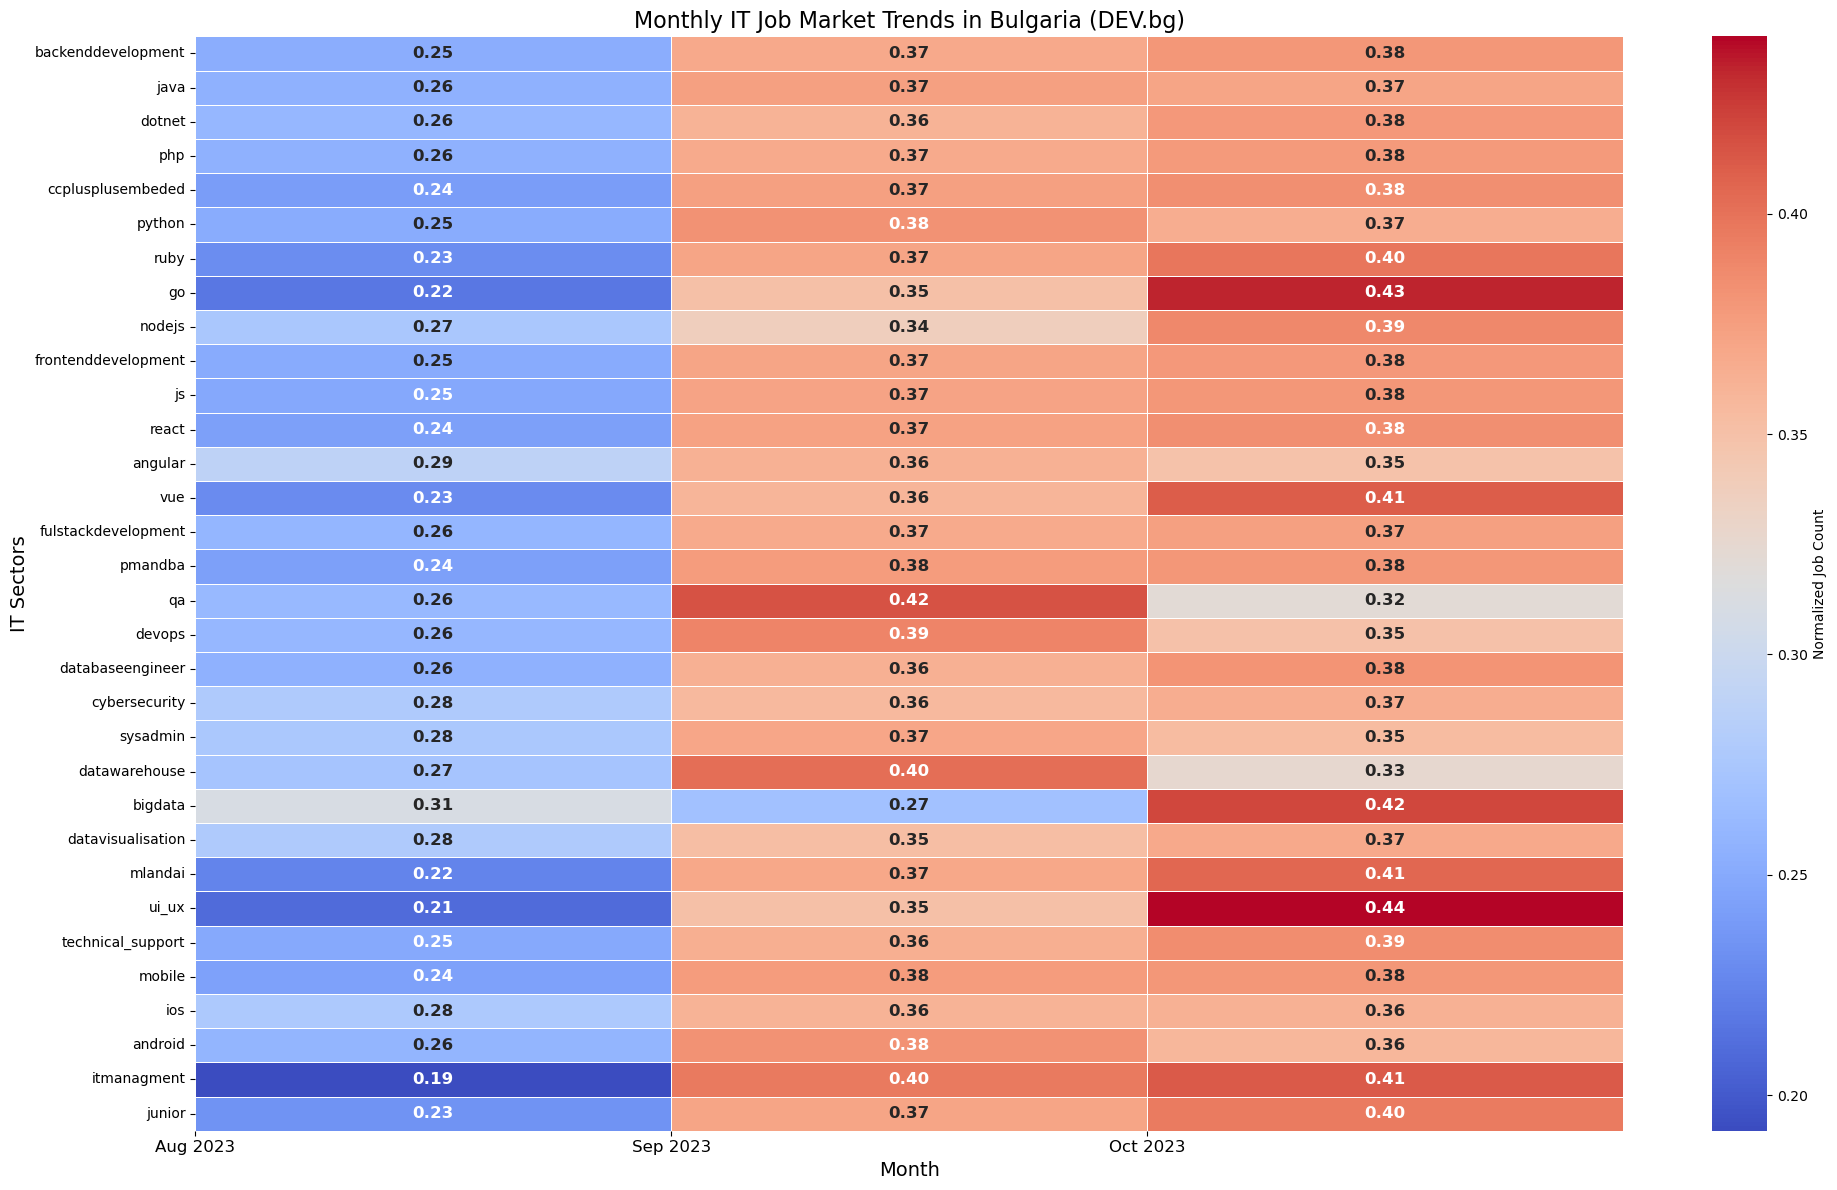

In [55]:
# Plot heatmap with gridlines and customized annotations
plt.figure(figsize=(20, 12))
ax = sns.heatmap(normalized_df.T, cmap="coolwarm", cbar_kws={'label': 'Normalized Job Count'},
                 annot=True, fmt=".2f", linewidths=0.5, linecolor='white', annot_kws={'size': 12, 'weight': 'bold'})

# Update x-axis labels to display month and year
ax.set_xticks(range(len(monthly_data.index)))
ax.set_xticklabels(monthly_data.index.strftime('%b %Y'), ha='center', fontsize=12)

# Set the title and labels
plt.title("Monthly IT Job Market Trends in Bulgaria (DEV.bg)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("IT Sectors", fontsize=14)

# Improve layout and remove ticks if needed
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('bg_it_job_marker_analysis.png', format='png', dpi=300)

# Show the plot
plt.show()